In [15]:
import os, random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_DATASET_PATH = r"C:\Users\AbdelRahman\Desktop\Eleveoo Pathways Internship\Data\images_original"


In [11]:
# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32

In [3]:
# Pick a genre and a random file
genre = "blues"   # change this to test other genres
folder = os.path.join(IMG_DATASET_PATH, genre)
file = random.choice(os.listdir(folder))  # pick a random spectrogram
img_path = os.path.join(folder, file)

print("Using image:", img_path)

Using image: C:\Users\AbdelRahman\Desktop\Eleveoo Pathways Internship\Data\images_original\blues\blues.00075.png


In [4]:
# Load and preprocess
IMG_SIZE = (128, 128)   # should match training
img = image.load_img(img_path, target_size=IMG_SIZE)
x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)

In [17]:
# Data generators (train/test split automatically)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
train_gen = datagen.flow_from_directory(
    IMG_DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 1243 images belonging to 10 classes.


In [18]:
# CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

In [19]:
# Predict
prediction = model.predict(x)
predicted_class = np.argmax(prediction, axis=1)[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


In [21]:
train_generator = datagen.flow_from_directory(
    IMG_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

Found 1243 images belonging to 10 classes.


In [22]:
# Map index → genre
idx_to_class = {v: k for k, v in train_generator.class_indices.items()}
predicted_genre = idx_to_class[predicted_class]

In [23]:
val_generator = datagen.flow_from_directory(
    IMG_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

print("Class indices:", train_generator.class_indices)

Found 310 images belonging to 10 classes.
Class indices: {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


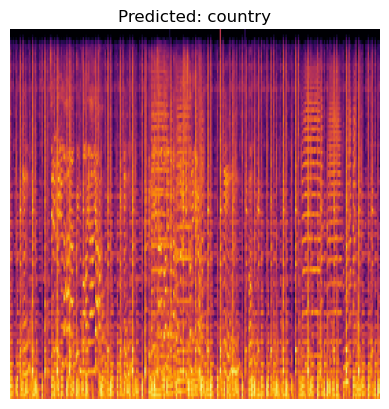

✅ Predicted genre: country


In [24]:
# Show results
plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.title(f"Predicted: {predicted_genre}")
plt.show()

print("✅ Predicted genre:", predicted_genre)